## Predictive modelling

Predictive modelling helps us in answering a simple question - "What will happen in future?" It is the process of using known results to create, process and validate a model that can be used to forecast future outcomes.It helps us in investigating the relationship between a dependent and independent variable. It indicates the significant relationships between dependent variable and independent variable and the strength of impact of multiple independent variables on a dependent variable. 

## Python libraries and predictive modelling



In [1]:
#import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
train = pd.read_csv("modified_train.csv")
test = pd.read_csv("modified_test.csv")

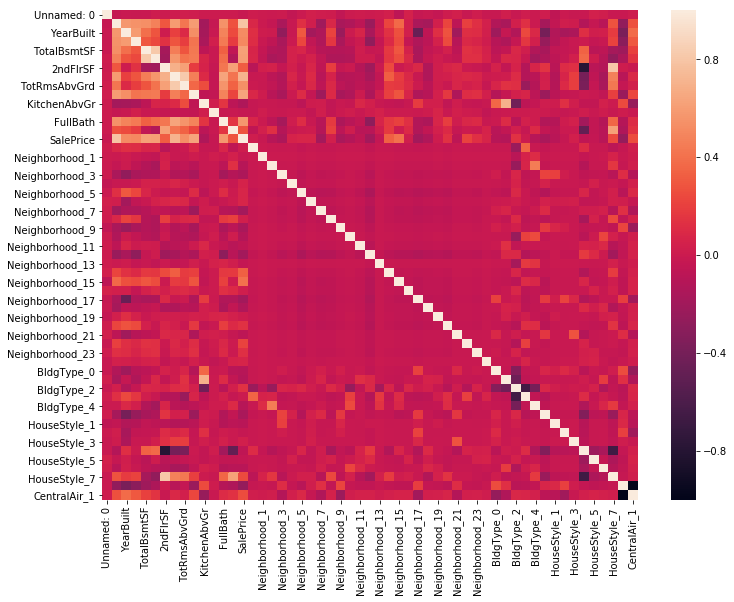

In [3]:
corr = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr)

## Linear model 

From correlation coefficients and from the hypothesis combined, I have used the two most influencial variables, living area and the overallQuality for my first linear model. It is a general idea that the Sale price varies with the area of the house, the overallQual is a controversial factor according to me. The OverallQual can be deceptive until we do not have a reliable souce for it. 

__Predictor: GrLivArea, OverallQual <br>
Target: SalePrice__<br><br>

In [4]:
train_linear = train
test_linear = test

In [5]:
target = 'SalePrice'
predictor_linear = ['GrLivArea', 'OverallQual']

In [6]:
X_train_linear = train_linear[predictor_linear]
y_train_linear = train_linear[[target]]
X_test_linear = test_linear[predictor_linear]
y_test_linear = test_linear[[target]]

In [7]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train_linear, y_train_linear)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
#linear regression between living area, overall quality and sale price
from sklearn.cross_validation import KFold, cross_val_score

k_fold = KFold(len(y_train_linear), n_folds=100, shuffle=True, random_state=25)
clf_linear = LinearRegression()
results = cross_val_score(clf_linear, X_train_linear, y_train_linear, cv=10 )
results.mean()

C:\Users\Baby Panda\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.713938479735926

>K-fold cross validation gives us an accuracy of 71% on the training set. Here, the over all quality plays an important giving us an accuracy as high as 71%  

In [9]:
results_rsme_linear = cross_val_score(clf_linear, X_train_linear, y_train_linear, scoring='neg_mean_squared_error')
results_rsme_linear = np.sqrt(np.abs(results_rsme_linear))

In [10]:
linear_train_predict = regressor_linear.predict(X_train_linear[predictor_linear])

In [11]:
print ("The rmse value for linear regression is: " )
print (results_rsme_linear.mean())


The rmse value for linear regression is: 
42643.65815962112


In [12]:
predict_test_linear = regressor_linear.predict(X_test_linear)

In [13]:
#Making a dataframe for predicted saleprice value of the training data
prediction_linear = pd.DataFrame(predict_test_linear, columns=['Test_Linear_SalePrice'])

#Making a combined dataframe
Model_linear = pd.concat([train_linear, prediction_linear], axis=1)

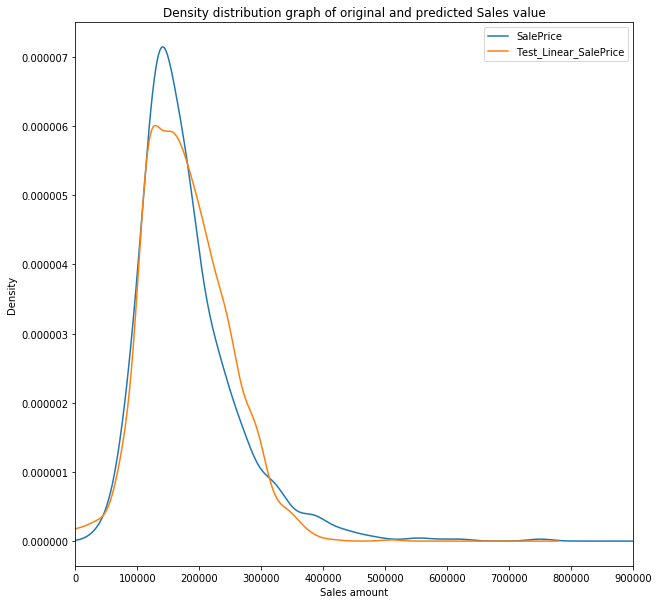

Mean of Original SalePrices:
180921.19589041095
Standard deviation of Original SalePrices:
79442.50288288663
Mean of Linear model predicted SalePrice:
178604.6463957421
Standard deviation of Linear model predicted SalePrice:
66284.76150328826


In [14]:
#Plotting the predicted Sale Price and Original Sale Price
combined_data_linear = pd.DataFrame(Model_linear[['SalePrice','Test_Linear_SalePrice']])
combined_data_linear.plot(kind="density",
              figsize=(10,10),
              xlim=(0,900000), title='Density distribution graph of original and predicted Sales value')
plt.xlabel('Sales amount')
plt.ylabel('Density')
plt.show()

print ('Mean of Original SalePrices:')
print (combined_data_linear['SalePrice'].mean())
print ('Standard deviation of Original SalePrices:')
print (combined_data_linear['SalePrice'].std())

print ('Mean of Linear model predicted SalePrice:')
print (combined_data_linear['Test_Linear_SalePrice'].mean())
print ('Standard deviation of Linear model predicted SalePrice:')
print (combined_data_linear['Test_Linear_SalePrice'].std())

<br><br>
>According to __Central Limit theorem__, given a sufficiently large sample size from the population with a finite level of variance the mean of all samples from same population will be approximately equal to the mean of the poopulation and all sample will follow a normal distribution.<br><br>
Here, considering the entire population to fit in the train data set, the mean and standard deviation of the of the sample does not have the same or approximately same standard deviation and mean as that of the population.<br><br>

#### <u>Linear model, Reloaded</u><br>

To check the influence of living area on sale price as the overallCondition can be deceptive.<br>

__Predictors:__ GrLiveArea<br><br>

In [15]:
train_linear_modified = train
test_linear_modified = test

In [16]:
target = 'SalePrice'

In [17]:
X_train_linear_modified = train_linear_modified[['GrLivArea']]
y_train_linear_modified = train_linear_modified[[target]]
X_test_linear_modified = test_linear_modified[['GrLivArea']]
y_test_linear_modified = test_linear_modified[[target]]

In [18]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train_linear_modified, y_train_linear_modified)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
#Cross validation with living area and sale price
from sklearn.cross_validation import KFold, cross_val_score

k_fold = KFold(len(y_train_linear_modified), n_folds=100, shuffle=True, random_state=25)
clf_linear = LinearRegression()
results = cross_val_score(clf_linear, X_train_linear_modified, y_train_linear_modified, cv=10 )
results.mean()

0.4996741636438167

In [20]:
linear_train_predict = regressor_linear.predict(X_train_linear_modified)

In [21]:
predict_test_linear_modified = regressor_linear.predict(X_test_linear_modified)

In [22]:
results_rsme_linear_modified = cross_val_score(clf_linear, X_train_linear_modified, y_train_linear_modified, scoring='neg_mean_squared_error')
results_rsme_linear_modified = np.sqrt(np.abs(results_rsme_linear_modified))

print ("The rmse value for linear regression is: " )
print (results_rsme_linear_modified.mean())


The rmse value for linear regression is: 
56404.79362753392


In [23]:
#Making a dataframe for predicted saleprice value of the training data
prediction_linear_modified = pd.DataFrame(predict_test_linear_modified, columns=['Test_Linear_SalePrice_modified'])

#Making a combined dataframe
Model_linear_modified = pd.concat([train_linear, prediction_linear_modified], axis=1)

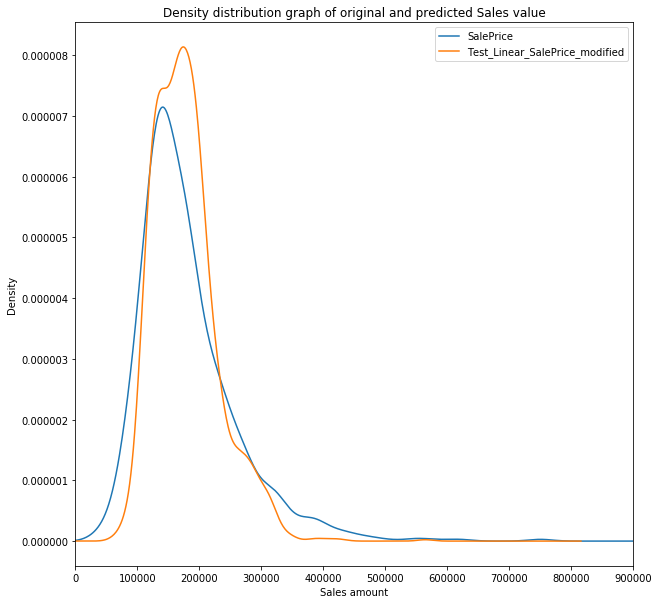

Mean of Original SalePrices:
180921.19589041095
Standard deviation of Original SalePrices:
79442.50288288663
Mean of Linear model predicted SalePrice:
177769.65890550925
Standard deviation of Linear model predicted SalePrice:
52018.870450358314


In [24]:
#Plotting the predicted Sale Price and Original Sale Price
combined_data_linear = pd.DataFrame(Model_linear_modified[['SalePrice','Test_Linear_SalePrice_modified']])
combined_data_linear.plot(kind="density",
              figsize=(10,10),
              xlim=(0,900000), title='Density distribution graph of original and predicted Sales value')
plt.xlabel('Sales amount')
plt.ylabel('Density')
plt.show()

print ('Mean of Original SalePrices:')
print (combined_data_linear['SalePrice'].mean())
print ('Standard deviation of Original SalePrices:')
print (combined_data_linear['SalePrice'].std())

print ('Mean of Linear model predicted SalePrice:')
print (combined_data_linear['Test_Linear_SalePrice_modified'].mean())
print ('Standard deviation of Linear model predicted SalePrice:')
print (combined_data_linear['Test_Linear_SalePrice_modified'].std())

>There is an improvement in the cross validation score by 22% when we consider both GrLivArea and SalePrice. So relying on just the area would not give us a better predictive model. 

#### <u>Linear model, Reloaded</u><br>

All the factors influencing the sale price<br>


In [25]:
train_linear_reloaded = train
test_linear_reloaded = test

In [26]:
train_linear_reloaded.head()

,Unnamed: 0,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,...,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,HouseStyle_4,HouseStyle_5,HouseStyle_6,HouseStyle_7,CentralAir_0,CentralAir_1
0,0,7,2003,2003,856.0,856,854,1710,8,2.0,...,0,0,0,0,0,0,0,1,0,1
1,1,6,1976,1976,1262.0,1262,0,1262,6,2.0,...,0,0,0,0,1,0,0,0,0,1
2,2,7,2001,2002,920.0,920,866,1786,6,2.0,...,0,0,0,0,0,0,0,1,0,1
3,3,7,1915,1970,756.0,961,756,1717,7,3.0,...,0,0,0,0,0,0,0,1,0,1
4,4,8,2000,2000,1145.0,1145,1053,2198,9,3.0,...,0,0,0,0,0,0,0,1,0,1


In [27]:
target = 'SalePrice'
Col = 'Unnamed: 0'
predictor_linear_all = [x for x in train_linear_reloaded.columns if x not in [target]+[Col]]

In [28]:
X_train_linear_reloaded = train_linear_reloaded[predictor_linear_all]
y_train_linear_reloaded= train_linear_reloaded[target]
X_test_linear_reloaded = test_linear_reloaded[predictor_linear_all]
y_test_linear_reloaded = test_linear_reloaded[target]

In [29]:
#Fit training model in the linear regression model
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train_linear_reloaded, y_train_linear_reloaded)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
#Cross validation with all predictors and saleprice
from sklearn.cross_validation import KFold, cross_val_score

k_fold = KFold(len(y_train_linear_reloaded), n_folds=100, shuffle=True, random_state=25)
clf_linear = LinearRegression()
results = cross_val_score(clf_linear, X_train_linear_reloaded, y_train_linear_reloaded, cv=10 )
results.mean()

0.8157247315572429

In [31]:
linear_train_predict = regressor_linear.predict(X_train_linear_reloaded)

predict_test_linear_reloaded = regressor_linear.predict(X_test_linear_reloaded)

results_rsme_linear_reloaded = cross_val_score(clf_linear, X_train_linear_reloaded, y_train_linear_reloaded, scoring='neg_mean_squared_error')
results_rsme_linear_reloaded = np.sqrt(np.abs(results_rsme_linear_reloaded))

print ("The rmse value for linear regression is: " )
print (results_rsme_linear_reloaded.mean())


The rmse value for linear regression is: 
34647.92581553174


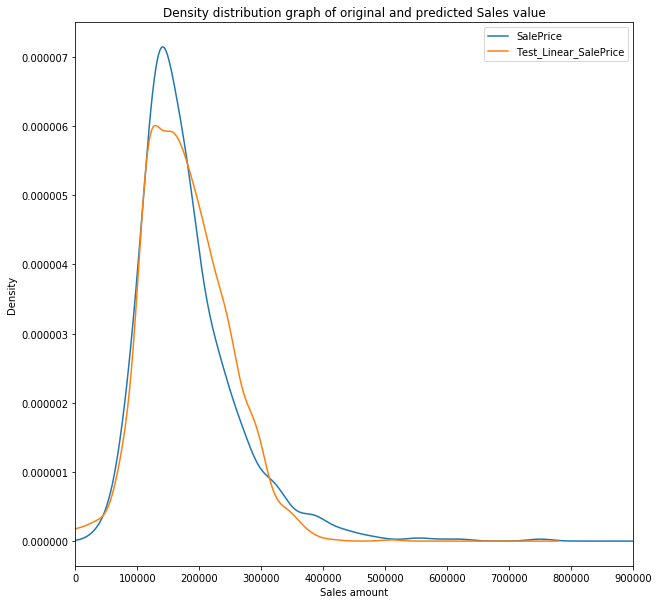

Mean of Original SalePrices:
180921.19589041095
Standard deviation of Original SalePrices:
79442.50288288663
Mean of Linear model predicted SalePrice:
178604.6463957421
Standard deviation of Linear model predicted SalePrice:
66284.76150328826


In [32]:
#Plotting the predicted Sale Price and Original Sale Price
combined_data_linear = pd.DataFrame(Model_linear[['SalePrice','Test_Linear_SalePrice']])
combined_data_linear.plot(kind="density",
              figsize=(10,10),
              xlim=(0,900000), title='Density distribution graph of original and predicted Sales value')
plt.xlabel('Sales amount')
plt.ylabel('Density')
plt.show()

print ('Mean of Original SalePrices:')
print (combined_data_linear['SalePrice'].mean())
print ('Standard deviation of Original SalePrices:')
print (combined_data_linear['SalePrice'].std())

print ('Mean of Linear model predicted SalePrice:')
print (combined_data_linear['Test_Linear_SalePrice'].mean())
print ('Standard deviation of Linear model predicted SalePrice:')
print (combined_data_linear['Test_Linear_SalePrice'].std())

### Ridge Model

Ridge model works just as a linear model except for the fact of penalizing the factors with are correlated. Ridge is generally used to resolve multi-collinearity in the variables.

__Predictor: Hypothesis selected factors<br>
Target: SalePrice__<br><br>

In [33]:
train_ridge_all = train
test_ridge_all = test

In [34]:
target = 'SalePrice'
Col = 'Unnamed: 0'
predictor_ridge_all = [x for x in train_ridge_all.columns if x not in [target]+[Col]]

In [35]:
X_train_ridge_all = train_ridge_all[predictor_ridge_all]
y_train_ridge_all= train_ridge_all[target]
X_test_ridge_all = test_ridge_all[predictor_ridge_all]
y_test_ridge_all = test_ridge_all[target]

In [36]:
#Fit training model in the linear regression model
from sklearn.linear_model import Ridge
ridge_model_all = Ridge(alpha=0.1, normalize=True)
ridge_model_all.fit(X_train_ridge_all, y_train_ridge_all)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [37]:
from sklearn.linear_model import Ridge
from sklearn.cross_validation import KFold, cross_val_score

k_fold = KFold(len(y_train_ridge_all), n_folds=20, shuffle=True, random_state=25)
clf_ridge_all = Ridge(alpha=0.1, normalize=True)
results_ridge = cross_val_score(clf_ridge_all, X_train_ridge_all, y_train_ridge_all.ravel(), cv=10)
results_ridge.mean()

0.8183929617641394

In [38]:
ridge_train_predict = ridge_model_all.predict(X_train_ridge_all)

predict_test_ridge = regressor_linear.predict(X_test_ridge_all)

results_rsme_ridge = cross_val_score(clf_ridge_all, X_train_ridge_all, y_train_ridge_all, scoring='neg_mean_squared_error')
results_rsme_ridge = np.sqrt(np.abs(results_rsme_ridge))

print ("The rmse value for ridge regression is: " )
print (results_rsme_ridge.mean())


The rmse value for ridge regression is: 
34397.15771602097


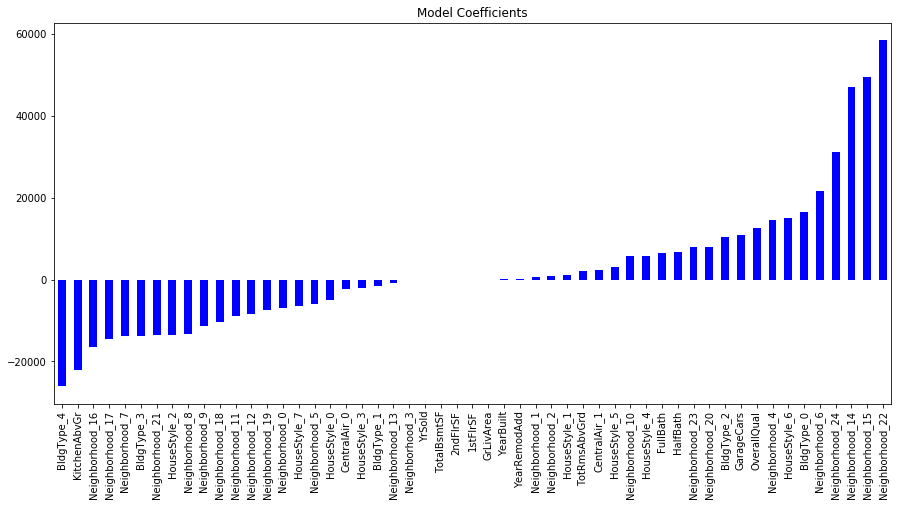

In [39]:
from pandas import Series
from sklearn import metrics
predictors_array = np.asarray(predictor_ridge_all)
#predictors_array.ndim

a = np.asarray(ridge_model_all.coef_)
d = a.ravel()
#print (predictors_array)
#s = pd.Series(d, index=predictors_array)
#print (s)
coef_ridge = pd.Series(d, predictors_array).sort_values()
coef_ridge.plot(kind='bar', 
           title='Model Coefficients',
           color = 'blue',
           figsize = (15, 7))

In [40]:
predict_test_ridge_all = ridge_model_all.predict(X_test_ridge_all)

In [41]:
#Making a dataframe for predicted saleprice value of the training data
prediction_ridge_all = pd.DataFrame(predict_test_ridge_all, columns=['Train_Ridge_all_SalePrice'])

#Making a combined dataframe
Model_ridge_all = pd.concat([train_ridge_all, prediction_ridge_all], axis=1)

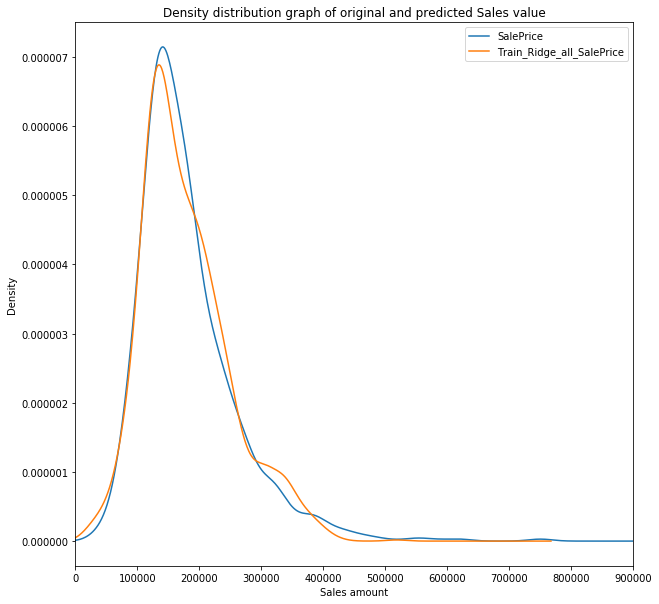

Mean of Original SalePrices:
180921.19589041095
Standard deviation of Original SalePrices:
79442.50288288663
Mean of Ridge model with all variables predicted SalePrice:
178590.71033078607
Standard deviation of Ridge model with all variables predicted SalePrice:
71446.76073426778


In [42]:
#Plotting the predicted Sale Price and Original Sale Price
combined_data = pd.DataFrame(Model_ridge_all[['SalePrice','Train_Ridge_all_SalePrice']])
combined_data.plot(kind="density",
              figsize=(10,10),
              xlim=(0,900000), title='Density distribution graph of original and predicted Sales value')
plt.xlabel('Sales amount') 
plt.ylabel('Density')
plt.show()

print ('Mean of Original SalePrices:')
print (combined_data['SalePrice'].mean())
print ('Standard deviation of Original SalePrices:')
print (combined_data['SalePrice'].std())

print ('Mean of Ridge model with all variables predicted SalePrice:')
print (combined_data['Train_Ridge_all_SalePrice'].mean())
print ('Standard deviation of Ridge model with all variables predicted SalePrice:')
print (combined_data['Train_Ridge_all_SalePrice'].std())

>The ridge model with all the variable gave the so far best cross validation score and also the predicted values for test case falls in a range of population mean and population standard deviation.

***

### Decision tree

Decision tree works with a pragmatic approach by considering the factors and dividing the dataset. According to me decision tree is one of the most powerful classification algorithm but gets a little complicated with regression trees. We often observe a pattern in scattering of dependent variable, it is not linear but can be classified or categorised dependending on factors affecting it. 

In [43]:
#decision tree dataset
train_decisionTree = train
test_decisionTree = test

In [44]:
#defining Predictors and target
target = 'SalePrice'
Col = 'Unnamed: 0'
predictor_decisionTree = [x for x in train_decisionTree.columns if x not in [target]+[Col]]

In [45]:
#Dividing dataset into dependent and independent variables
X_train_decisionTree = train_decisionTree[predictor_decisionTree]
y_train_decisionTree = train_decisionTree[[target]]
X_test_decisionTree = test_decisionTree[predictor_decisionTree]
y_test_decisionTree = test_decisionTree[[target]]

In [46]:
#standardising the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_decisionTree = sc_X.fit_transform(X_train_decisionTree)
y_train_decisionTree = sc_y.fit_transform(y_train_decisionTree)
X_test_decisionTree = sc_X.fit_transform(X_test_decisionTree)

In [47]:
#apply decision tree regression
from sklearn.tree import DecisionTreeRegressor
regressor_decisiontree = DecisionTreeRegressor(random_state=0, min_samples_split=18)
regressor_decisiontree.fit(X_train_decisionTree, y_train_decisionTree)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=18, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [48]:
#Decision tree cross validation
from sklearn.cross_validation import KFold, cross_val_score

k_fold = KFold(len(y_train_decisionTree), n_folds=10, shuffle=True, random_state=25)
clf_decisionTree = DecisionTreeRegressor(random_state=0, min_samples_split=18, max_features= 18)
results = cross_val_score(clf_decisionTree, X_train_decisionTree, y_train_decisionTree.ravel(), cv=10 )
results.mean()

0.7539111561151752

In [49]:
decision_train_predict = regressor_decisiontree.predict(X_train_decisionTree)

predict_test_decisionTree= regressor_decisiontree.predict(X_test_decisionTree)

results_rsme_decisionTree = cross_val_score(clf_decisionTree, X_train_decisionTree, y_train_decisionTree, scoring='neg_mean_squared_error')
results_rsme_decisionTree = np.sqrt(np.abs(results_rsme_decisionTree))

print ("The rmse value for decision Tree regression is: " )
print (results_rsme_decisionTree.mean())


The rmse value for decision Tree regression is: 
0.4929124486340064


In [50]:
#Apply decision tree on test
predict_test_decisionTree= regressor_decisiontree.predict(X_test_decisionTree)

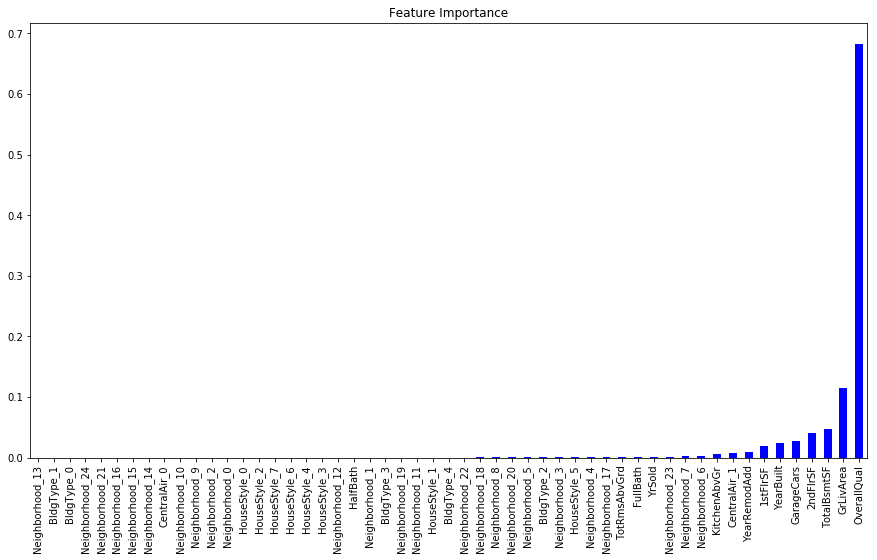

In [51]:
#Plot coefficient of predicted values
from pandas import Series
predictors_array = np.asarray(predictor_decisionTree)
#predictors_array.ndim
a = np.asarray(regressor_decisiontree.feature_importances_)
d = a.ravel()
#print (predictors_array)
#s = pd.Series(d, index=predictors_array)
#print (s)
coef2 = pd.Series(d, predictors_array).sort_values()
coef2.plot(kind='bar', 
           title='Feature Importance',
           color = 'blue',
           figsize = (15, 8))

In [52]:
#inverse standard scalar
predict_test_decisionTree = sc_y.inverse_transform(predict_test_decisionTree)

In [53]:
#Making a dataframe for predicted saleprice value of the training data
prediction_decisionTree = pd.DataFrame(predict_test_decisionTree, columns=['Train_DecisionTree_SalePrice'])

#Making a combined dataframe
Model_decisionTree = pd.concat([train_decisionTree, prediction_decisionTree], axis=1)

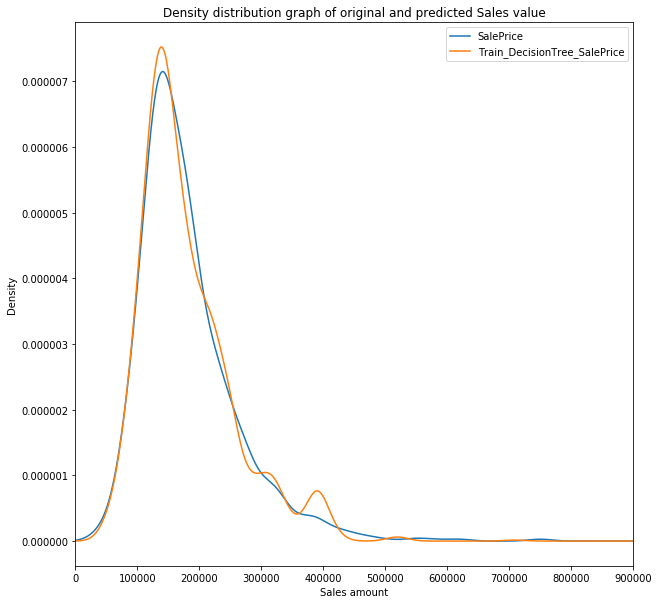

Mean of Original SalePrices:
180921.19589041095
Standard deviation of Original SalePrices:
79442.50288288663
Mean of Linear model predicted SalePrice:
180408.50231559726
Standard deviation of Linear model predicted SalePrice:
76252.28057015181


In [54]:
#Plotting the predicted Sale Price and Original Sale Price
combined_data_decisionTree = pd.DataFrame(Model_decisionTree[['SalePrice','Train_DecisionTree_SalePrice']])
combined_data_decisionTree.plot(kind="density",
              figsize=(10,10),
              xlim=(0,900000), title='Density distribution graph of original and predicted Sales value')
plt.xlabel('Sales amount')
plt.ylabel('Density')
plt.show()

print ('Mean of Original SalePrices:')
print (combined_data_decisionTree['SalePrice'].mean())
print ('Standard deviation of Original SalePrices:')
print (combined_data_decisionTree['SalePrice'].std())

print ('Mean of Linear model predicted SalePrice:')
print (combined_data_decisionTree['Train_DecisionTree_SalePrice'].mean())
print ('Standard deviation of Linear model predicted SalePrice:')
print (combined_data_decisionTree['Train_DecisionTree_SalePrice'].std())

The decision tree algorithm is usually said to have worked more efficiently if there is no colinearity between variables. Here, the ridge model out performs the decision tree and clearly implementing we need penalization for some features.

### Random Forest

How about we implement decision tree several times to have more clear understanding of the variables affecting the sale price and the overall accuracy of the model

In [55]:
train_randomForest = train
test_randomForest = test

In [56]:
train_randomForest = train_randomForest.drop(['Unnamed: 0'], axis=1)
test_randomForest = test_randomForest.drop(['Unnamed: 0'], axis=1)

In [57]:
target = 'SalePrice'
predictor_randomForest = [x for x in train_randomForest.columns if x not in [target]]

In [58]:
X_train_randomForest = train_randomForest[predictor_randomForest]
y_train_randomForest = train_randomForest[[target]]
X_test_randomForest = test_randomForest[predictor_randomForest]
y_test_randomForest = test_randomForest[[target]]

In [59]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_randomForest = sc_X.fit_transform(X_train_randomForest)
y_train_randomForest = sc_y.fit_transform(y_train_randomForest)
X_test_randomForest = sc_X.fit_transform(X_test_randomForest)

In [60]:
from sklearn.ensemble import RandomForestRegressor
regressor_randomForest = RandomForestRegressor(random_state=0, min_samples_split=6)
regressor_randomForest.fit(X_train_randomForest, y_train_randomForest.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import KFold, cross_val_score

k_fold = KFold(len(y_train_randomForest), n_folds=10, shuffle=True, random_state=25)
clf_randomForest = RandomForestRegressor(random_state=0, min_samples_split=20)
results = cross_val_score(clf_randomForest, X_train_randomForest, y_train_randomForest.ravel(), cv=10 )
results.mean()

0.8385997651966463

In [62]:
random_Forest_predict = regressor_randomForest.predict(X_train_randomForest)

predict_test_randomForest= regressor_randomForest.predict(X_test_randomForest)

results_rsme_randomForest = cross_val_score(clf_randomForest, X_train_randomForest, y_train_randomForest.ravel(), scoring='neg_mean_squared_error')
results_rsme_randomForest = np.sqrt(np.abs(results_rsme_randomForest))

print ("The rmse value for Random Forest is: " )
print (results_rsme_randomForest.mean())


The rmse value for Random Forest is: 
0.4124421313631705


In [63]:
predict_test_randomForest = regressor_randomForest.predict(X_test_randomForest)

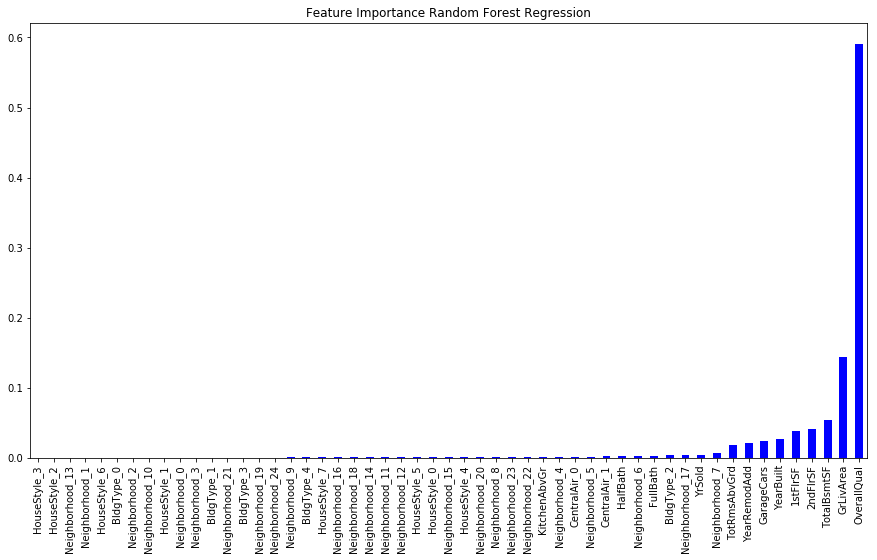

In [64]:
from pandas import Series
predictors_array = np.asarray(predictor_randomForest)
a = np.asarray(regressor_randomForest.feature_importances_)
d = a.ravel()

randomForest_coef = pd.Series(d, predictors_array).sort_values()
randomForest_coef.plot(kind='bar', 
           title='Feature Importance Random Forest Regression',
           color = 'blue',
           figsize = (15, 8))

In [65]:
#Reverse Standard scalar
predict_test_randomForest = sc_y.inverse_transform(predict_test_randomForest)

#Making a dataframe for predicted saleprice value of the training data
prediction_randomForest = pd.DataFrame(predict_test_randomForest, columns=['Train_randomForest_SalePrice'])

#Making a combined dataframe
Model_decisionTree = pd.concat([train_randomForest, prediction_randomForest], axis=1)

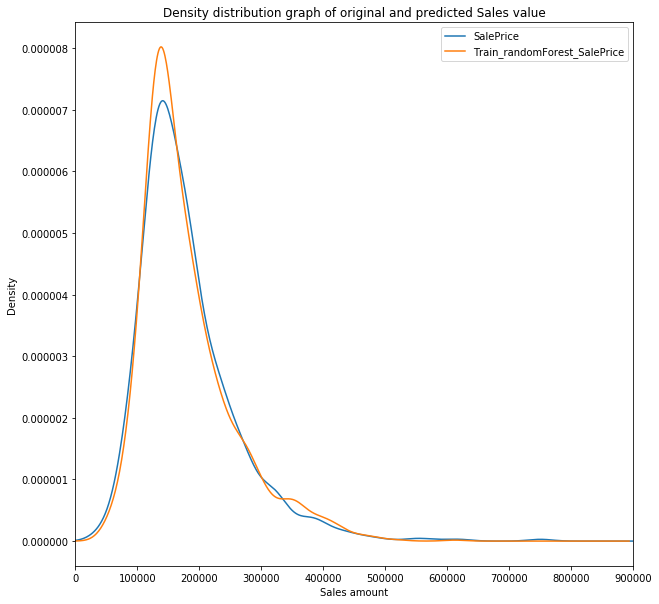

Mean of Original SalePrices:
180921.19589041095
Standard deviation of Original SalePrices:
79442.50288288663
Mean of Linear model predicted SalePrice:
180542.6485362421
Standard deviation of Linear model predicted SalePrice:
75317.19889169135


In [66]:
#Plotting the predicted Sale Price and Original Sale Price
combined_data_randomForest = pd.DataFrame(Model_decisionTree[['SalePrice','Train_randomForest_SalePrice']])
combined_data_randomForest.plot(kind="density",
              figsize=(10,10),
              xlim=(0,900000), title='Density distribution graph of original and predicted Sales value')
plt.xlabel('Sales amount')
plt.ylabel('Density')
plt.show()

print ('Mean of Original SalePrices:')
print (combined_data_randomForest['SalePrice'].mean())
print ('Standard deviation of Original SalePrices:')
print (combined_data_randomForest['SalePrice'].std())

print ('Mean of Linear model predicted SalePrice:')
print (combined_data_randomForest['Train_randomForest_SalePrice'].mean())
print ('Standard deviation of Linear model predicted SalePrice:')
print (combined_data_randomForest['Train_randomForest_SalePrice'].std())

>The Random Forest algorithm not only observes the lowest RMSE value but gives us the best accuracy in K-fold cross validation. 

### Linear regression for gr area smaller than 3000 sq feet

In the plot between the GrLivArea and sale price, we observe that the houses with area less than 300 sq feet have less variance and observes more linear nature compared to the houses with higher area

In [67]:
train_linear_model = train
test_linear_model = test

In [68]:
train_linear_model = train_linear_model.loc[train_linear_model['GrLivArea'] < 3000 ]

In [69]:
test_linear_model = test_linear_model.loc[test_linear_model['GrLivArea'] < 3000 ]

In [70]:
target = 'SalePrice'
predictor_linear = ['GrLivArea']

In [71]:
X_train_linear_model = train_linear_model[predictor_linear]
y_train_linear_model = train_linear_model[[target]]
X_test_linear_model = test_linear_model[predictor_linear]
y_test_linear_model = test_linear_model[[target]]

In [72]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train_linear_model, y_train_linear_model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
#linear regression between sale price and living area
from sklearn.cross_validation import KFold, cross_val_score

k_fold = KFold(len(y_train_linear_model), n_folds=10, shuffle=True, random_state=25)
clf_linear = LinearRegression()
results = cross_val_score(clf_linear, X_train_linear_model, y_train_linear_model, cv=10 )
results.mean()

0.4895624945389997

We observed from the plot that houses with smaller area tend to have a linear relation with sale price, taking higher area houses into consideration, they tend to have more variance. But our linear model fails to predict with a better accuracy or performs with same range of accuracy with houses of larger area. 

### Conclusion

Since random forest algorithm gives us a higher accuracy we might be decieved to consider it as a better algorithm but considering the multi-colinearity in the dataset variables, it would be be advisable to use Ridge regression which penalizes the factors with multi-colinearity and with more data the model will tend to improve.